In [2]:
import cv2 as cv
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt 

In [3]:
!pip install numpy

In [4]:
train_set = pd.read_csv('D:\STUDY\AUTONOMOUS/mnist_train.csv').values
test_set = pd.read_csv('D:\STUDY\AUTONOMOUS/mnist_test.csv').values    #to convert it to numpy format add values

In [5]:
x_train = train_set[:,1:]    #images
y_train = train_set[:,:1]    #predication numbers LABELS

x_train = np.reshape(x_train,(60000,28,28,1)) #28,28 in 1D

x_train = x_train/255.

In [6]:
x_test = test_set[:,1:]    #images
y_test = test_set[:,:1]    #predication numbers LABELS

x_test = np.reshape(x_test,(10000,28,28,1)) #28,28 in 1D

x_test = x_test/255.

# CNN Architecture Building

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D  
#1d neuron,add up convo reduce size of img,cut down no of weights,
#convert multi dimensional img to 1D,pass a filter of size through whole image

In [8]:
model = Sequential()

model.add(Conv2D(28, kernel_size = (3,3),input_shape = (28,28,1)))  #shape of input passing
model.add(Conv2D(28, kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(10,activation = tf.nn.softmax)) #10 values to predict gives prob distri

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [9]:
model.fit(x = x_train,y = y_train, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 70s 36ms/step - loss: 0.3017 - accuracy: 0.9073
Epoch 2/7
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0707 - accuracy: 0.9779
Epoch 3/7
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0469 - accuracy: 0.9851
Epoch 4/7
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0385 - accuracy: 0.9869
Epoch 5/7
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0284 - accuracy: 0.9907
Epoch 6/7
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0258 - accuracy: 0.9913
Epoch 7/7
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0242 - accuracy: 0.9921


In [10]:
model.evaluate(x_train,y_train) #accuracy

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0110 - accuracy: 0.9963


[0.011039462871849537, 0.9962833523750305]

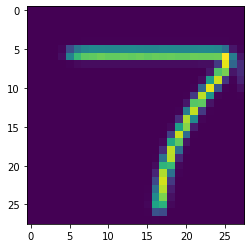

The image is of: 7


In [11]:
img = cv.imread('D:\STUDY\AUTONOMOUS/seven.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = gray/255.
gray = 1.-gray #to invert number and colour

gray = cv.resize(gray,(28,28))

plt.imshow(gray)
plt.show()

gray = np.reshape(gray,(1,28,28,1))    #to comapre to mnist 

print ("The image is of:",np.argmax(model.predict(gray)))  #to pass gray img,10 values deduced with DENSE layer
result = model.predict(gray)                                  #ARGMAX gives us return which has max value/prob


In [12]:
for i in result[0]:
    print(i)

9.641656e-10
3.5200376e-09
1.5672933e-08
2.0099309e-09
1.0819068e-09
1.2737325e-10
3.2644606e-14
1.0
2.7078178e-08
2.9520905e-08


In [13]:
np.argmax(result)

7

In [14]:
temp_img = np.reshape(train_set[0][1:],(28,28))

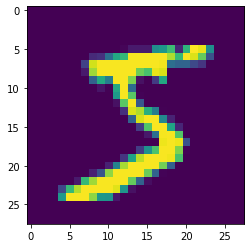

In [15]:
plt.imshow(temp_img) #2 channel hence different color

In [16]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data() #download and resized ready

# save models

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 28)        7084      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               516224    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [18]:
model.save('CNN_7epochs.h5')